In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



character(0)

In [2]:
library(igraph)



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




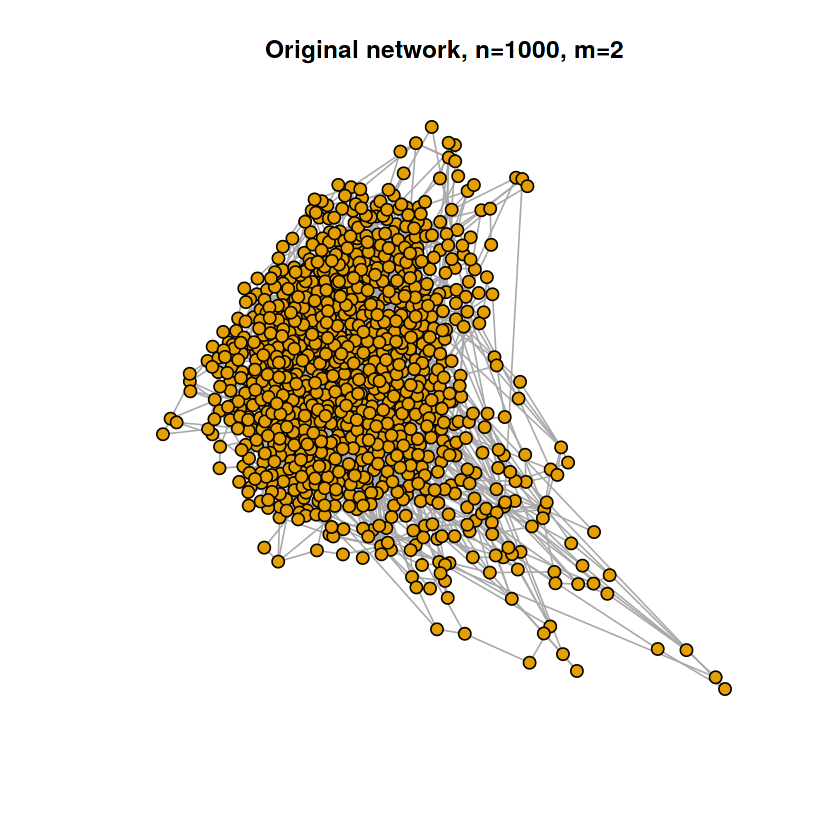

Modularity, n=1000: 0.525755959928875
Community size:  17

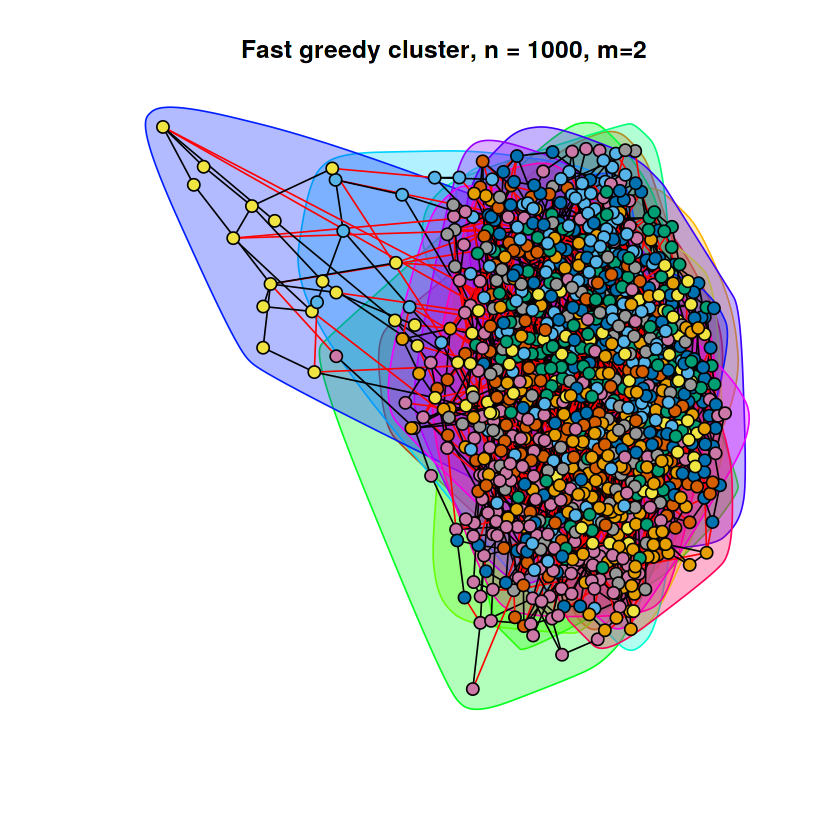

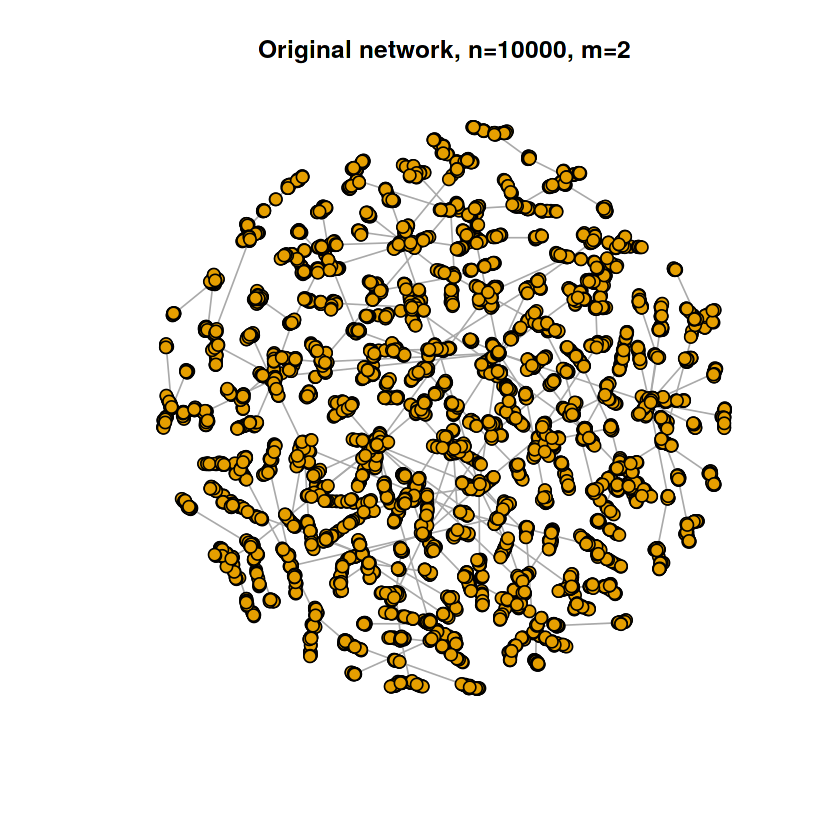

Modularity, n=10000: 0.978319924201655
Community size:  108

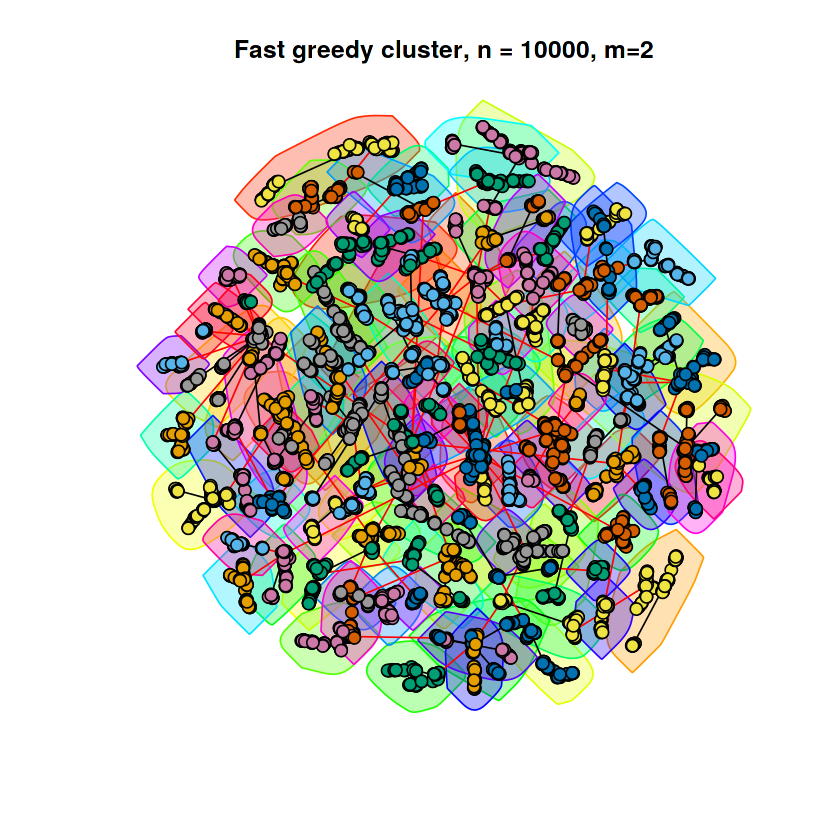

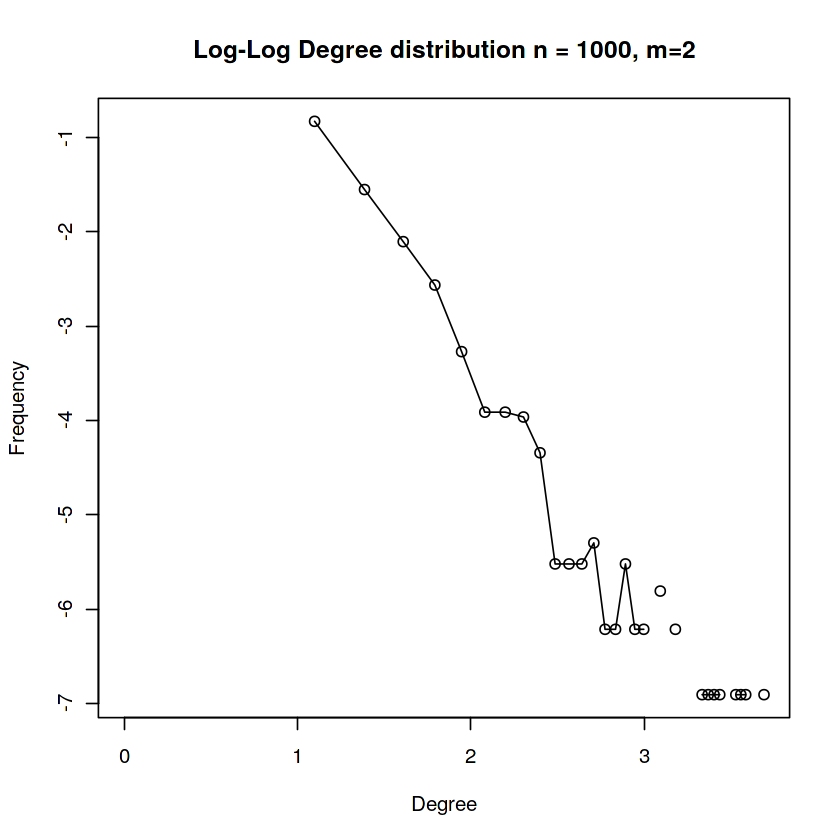


Call:
lm(formula = deg_log ~ log_x)

Coefficients:
(Intercept)        log_x  
     -2.924       -1.351  



Call:
lm(formula = large_deg_log ~ large_log_x)

Coefficients:
(Intercept)  large_log_x  
     -1.524       -2.139  


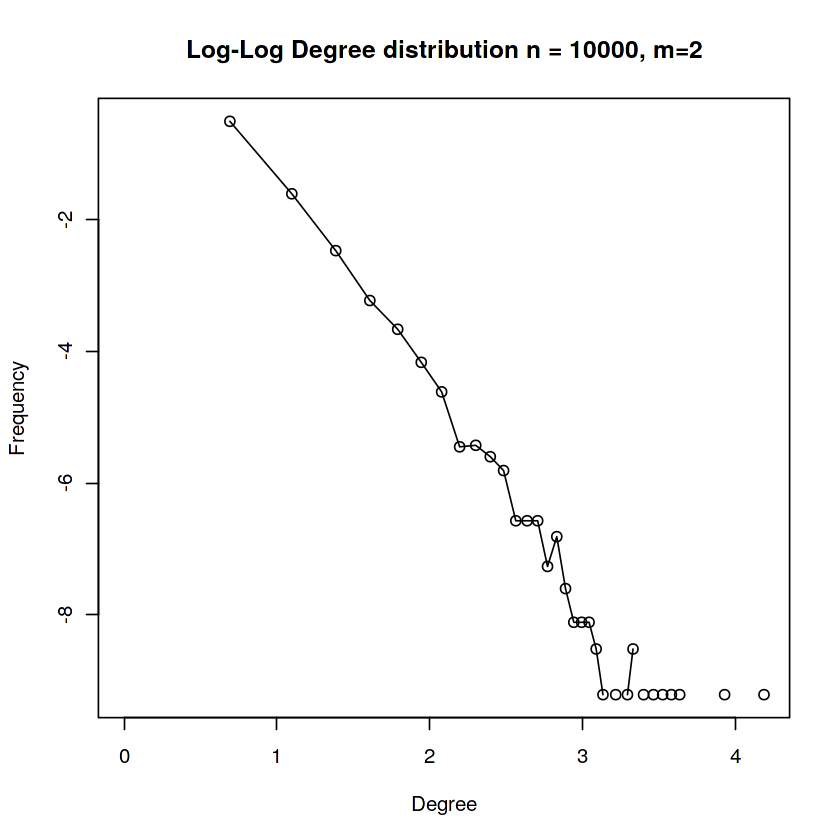


Call:
lm(formula = rand_deg_log ~ rand_log_freq)

Coefficients:
  (Intercept)  rand_log_freq  
       4.6507        -0.7457  


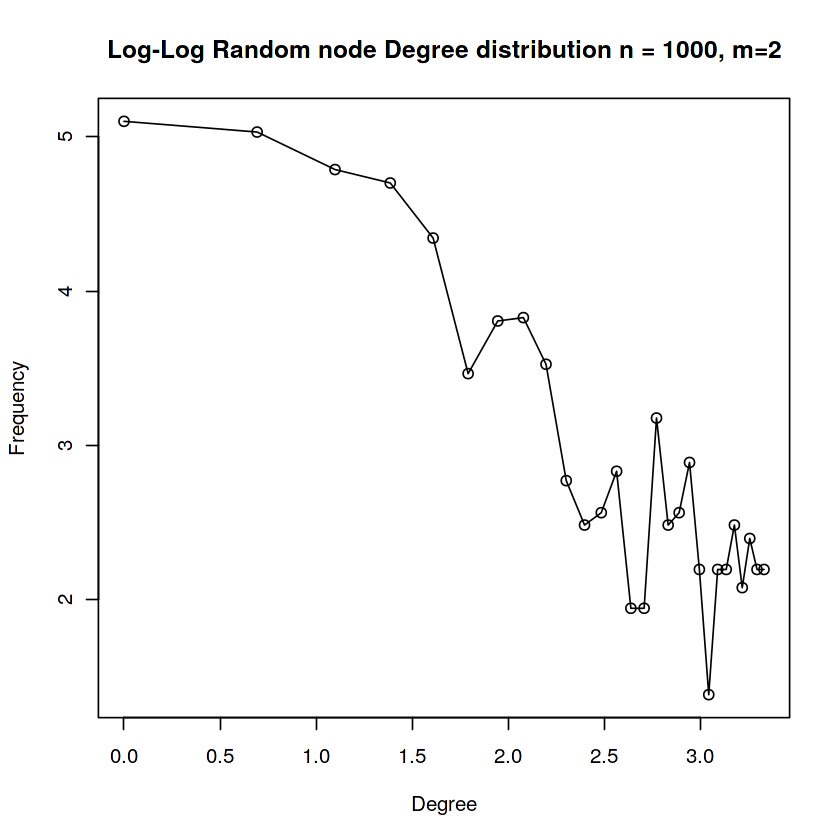


Call:
lm(formula = rand_deg_log ~ rand_log_freq)

Coefficients:
  (Intercept)  rand_log_freq  
       4.6920        -0.4844  


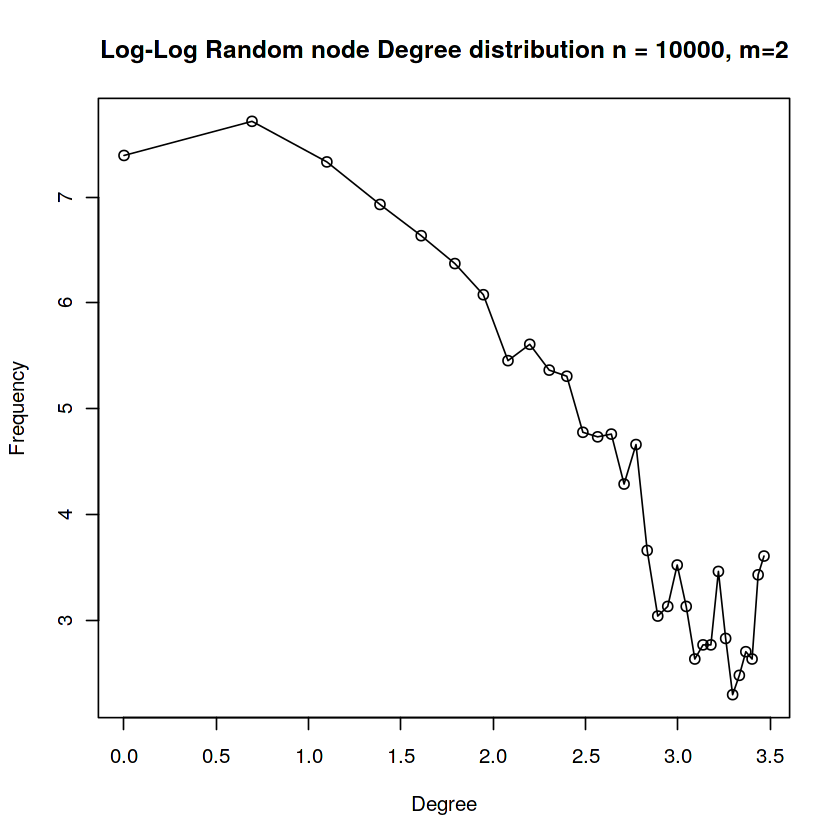

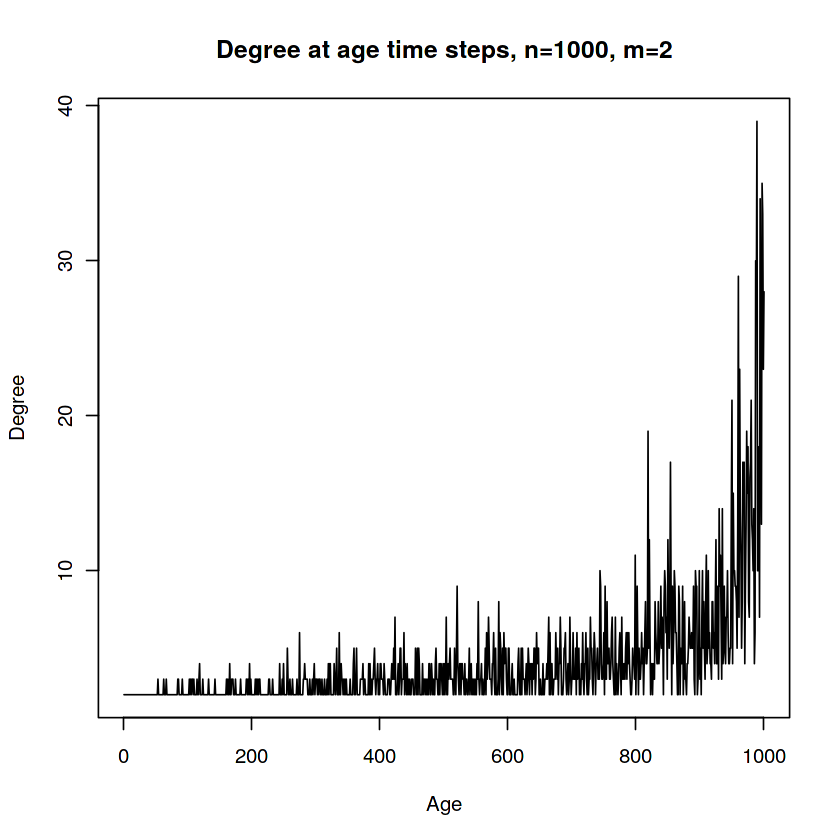

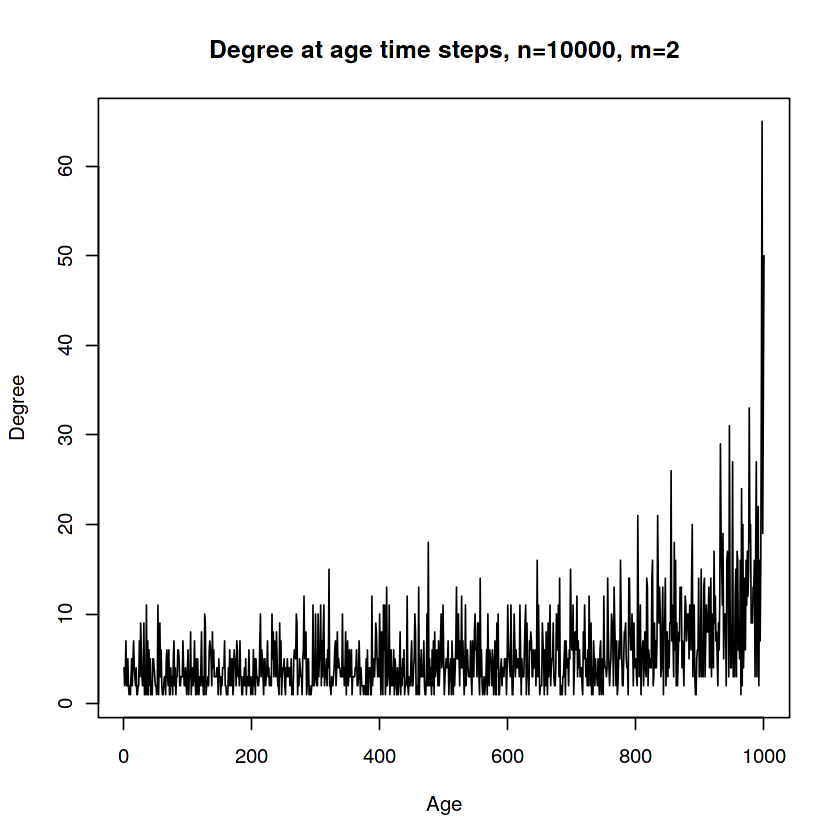

In [3]:
#part g - repeat for m = 2

#part b, c

g_p <- sample_pa(1000, m=2, directed=FALSE)


greedy_p <- cluster_fast_greedy(g_p)
plot(g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Original network, n=1000, m=2")
plot(greedy_p, g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Fast greedy cluster, n = 1000, m=2")

mod_p <- modularity(greedy_p)
cat(paste("Modularity, n=1000: ", mod_p, "\n", sep=""))
cat(paste("Community size: ", length(greedy_p)))



large_g_p <- sample_pa(10000, m=1, directed=FALSE)


large_greedy_p <- cluster_fast_greedy(large_g_p)
plot(large_g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Original network, n=10000, m=2")
plot(large_greedy_p, large_g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Fast greedy cluster, n = 10000, m=2")

large_mod_p <- modularity(large_greedy_p)
cat(paste("Modularity, n=10000: ", large_mod_p, "\n", sep=""))
cat(paste("Community size: ", length(large_greedy_p)))

#part d

deg <- degree_distribution(g_p)
large_deg <- degree_distribution(large_g_p)

    
#x values
log_x <- log(c(1:length(deg)))
large_log_x <- log(c(1:length(large_deg)))
#y values
deg_log <- log(deg)
large_deg_log <- log(large_deg)

#plot log-log
plot(log_x, deg_log, type="o", xlab = "Degree", ylab = "Frequency", main = "Log-Log Degree distribution n = 1000, m=2")
plot(large_log_x, large_deg_log, type="o", xlab = "Degree", ylab = "Frequency", main = "Log-Log Degree distribution n = 10000, m=2")


#remove -inf from log(0)
deg_log = replace(deg_log, is.infinite(deg_log), -10)
lm(deg_log ~ log_x)

large_deg_log = replace(large_deg_log, is.infinite(large_deg_log), -10)
lm(large_deg_log ~ large_log_x)

#part e

#g_p, large_g_p

n <- 1000
rand_degree <- c()

#pick random node i
for (i in 1:n) 
{
    rand_node <- sample(1:n, 1)
    #pick random neighbor j
    rand_neighbors <- neighbors(g_p, v=rand_node)
    if (length(neighbors) > 0)
    {
        neighbor_index <- sample(1:length(rand_neighbors), 1)
        rand_degree[i] <- degree(g_p, rand_neighbors[neighbor_index]) 
    }
}


# get degree - frequency vectors
deg_table <- as.data.frame(table(rand_degree))
#degrees <- as.numeric(as.vector((degree.freq.table[[1]])))
#freq <- degree.freq.table[[2]] / n


rand_deg_log <- log(as.numeric(deg_table$rand_degree))
rand_log_freq <- log(as.numeric(deg_table$Freq))

plot(rand_deg_log, rand_log_freq, type="o", xlab = "Degree", ylab = "Frequency", main = "Log-Log Random node Degree distribution n = 1000, m=2")

#find slopes
rand_deg_log = replace(rand_deg_log, is.infinite(rand_deg_log), -10)
lm(rand_deg_log ~ rand_log_freq)


#do the same thing for n=10000

n <- 10000
rand_degree <- c()

#pick random node i
for (i in 1:n) 
{
    rand_node <- sample(1:n, 1)
    #pick random neighbor j
    rand_neighbors <- neighbors(large_g_p, v=rand_node)
    if (length(neighbors) > 0)
    {
        neighbor_index <- sample(1:length(rand_neighbors), 1)
        rand_degree[i] <- degree(large_g_p, rand_neighbors[neighbor_index]) 
    }
}


# get degree - frequency vectors
deg_table <- as.data.frame(table(rand_degree))


rand_deg_log <- log(as.numeric(deg_table$rand_degree))
rand_log_freq <- log(as.numeric(deg_table$Freq))

plot(rand_deg_log, rand_log_freq, type="o", xlab = "Degree", ylab = "Frequency", main = "Log-Log Random node Degree distribution n = 10000, m=2")


#find slopes
rand_deg_log = replace(rand_deg_log, is.infinite(rand_deg_log), -10)
lm(rand_deg_log ~ rand_log_freq)


#part f

#g_p, large_g_p

age_deg <-rev(degree(g_p)[1:1000])
plot(age_deg, type='l', xlab = "Age", ylab = "Degree", main="Degree at age time steps, n=1000, m=2")

large_age_deg <-rev(degree(large_g_p)[1:1000])
plot(large_age_deg, type='l', xlab = "Age", ylab = "Degree", main="Degree at age time steps, n=10000, m=2")

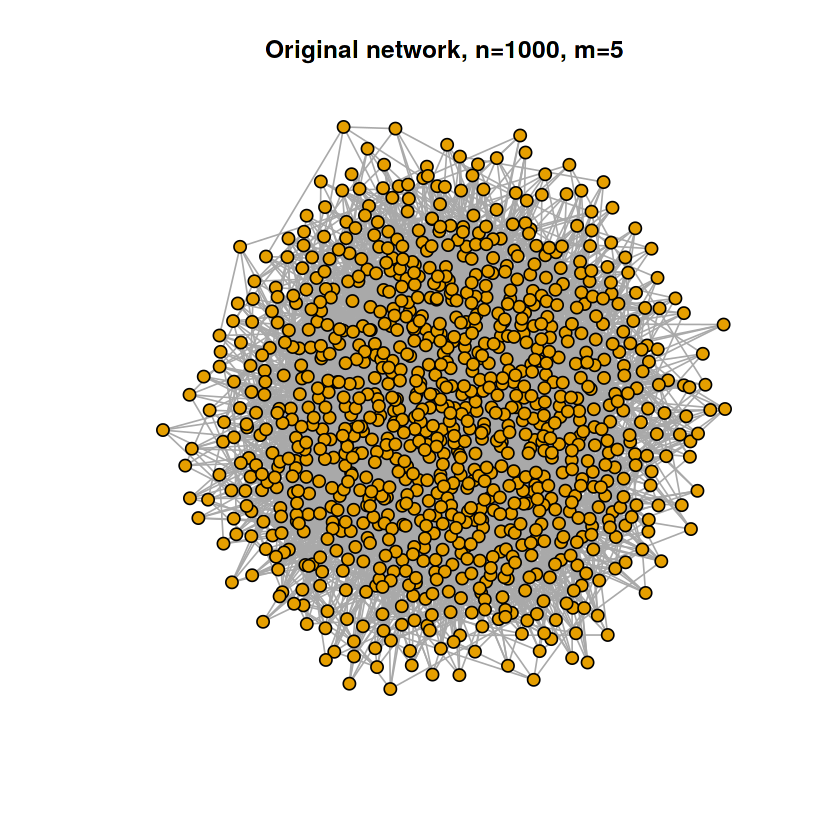

Modularity, n=1000: 0.278251726091011
Community size:  10

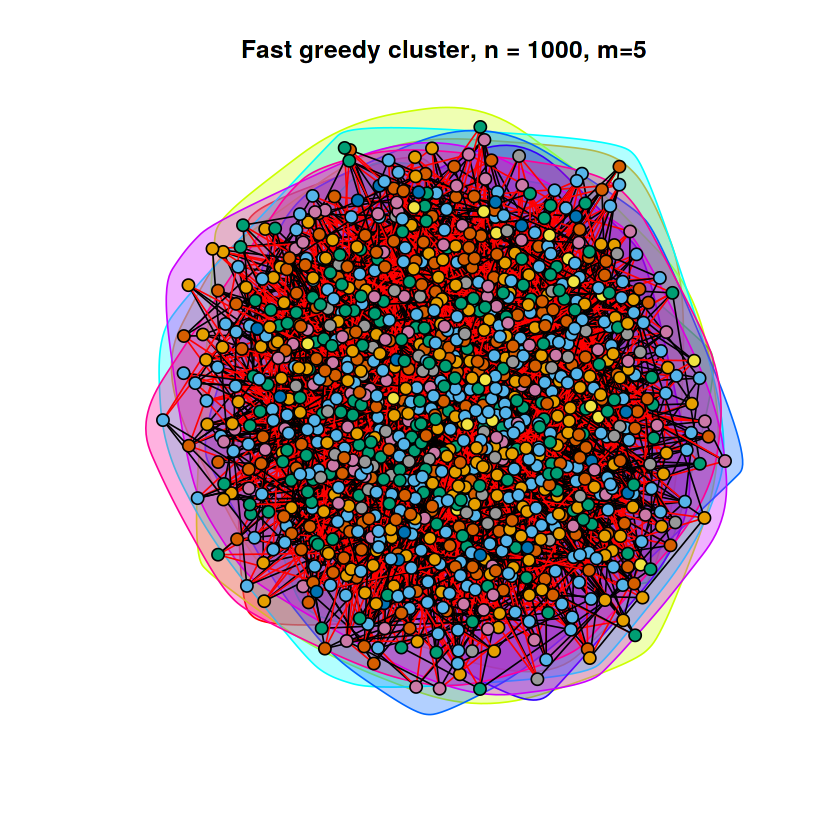

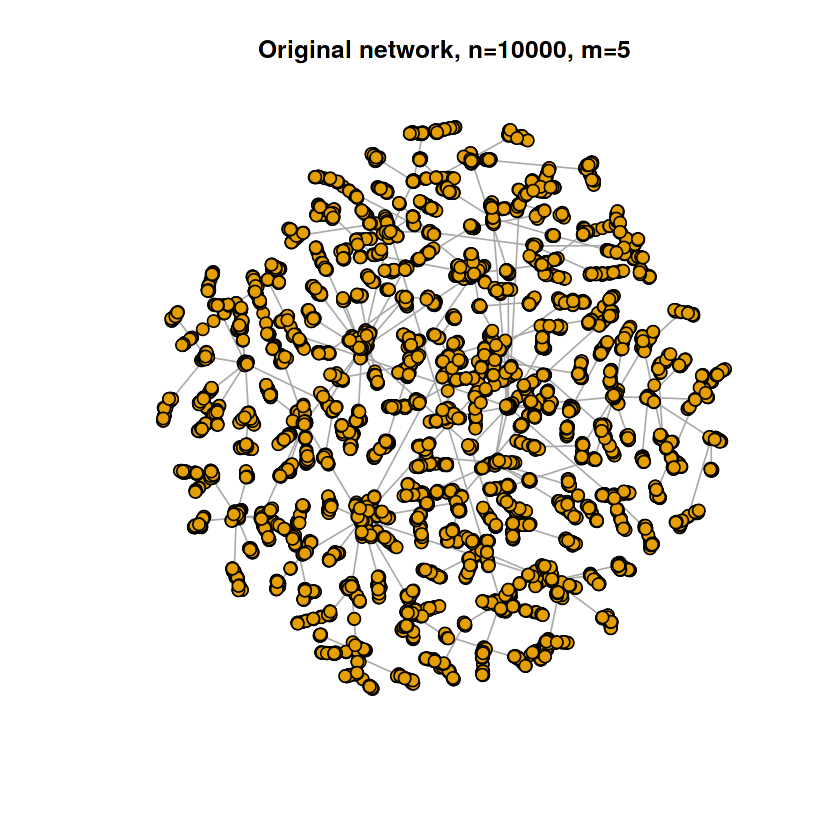

Modularity, n=10000: 0.978434287073091
Community size:  106

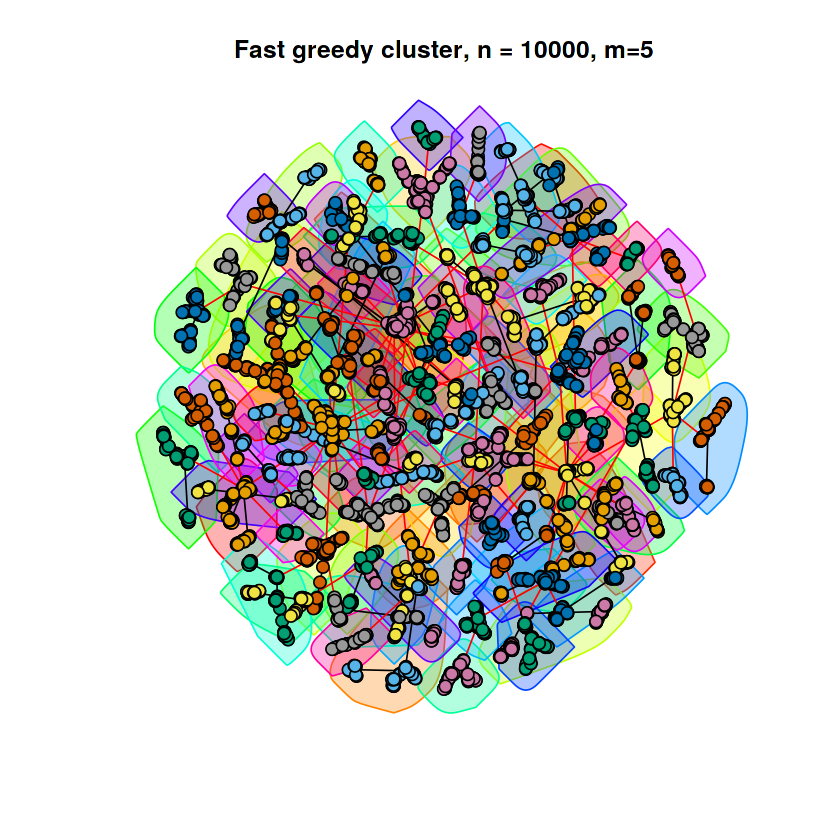

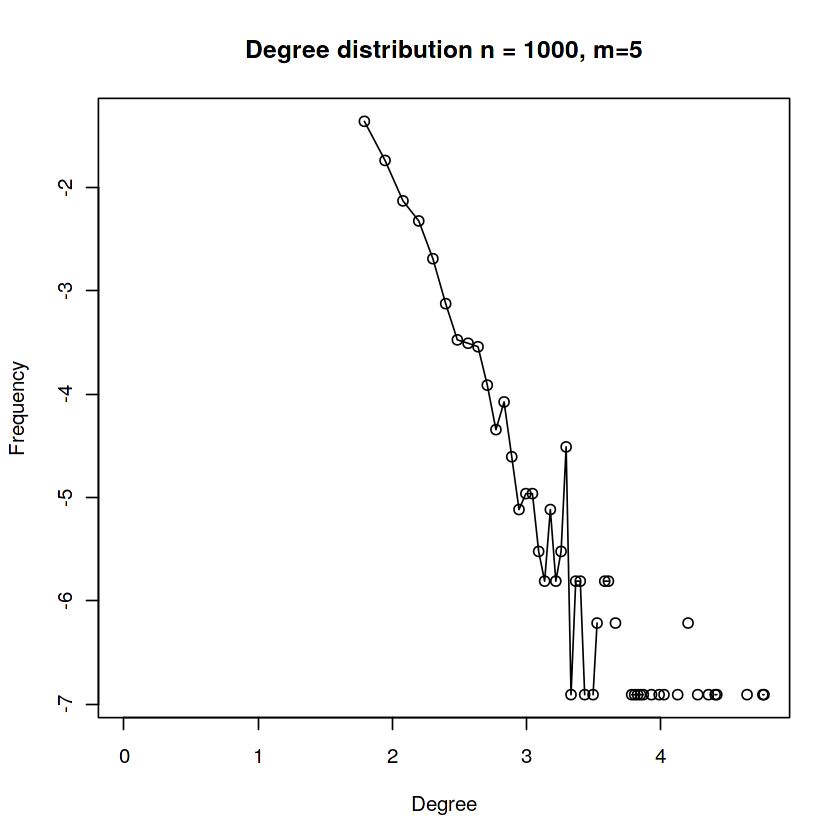


Call:
lm(formula = deg_log ~ log_x)

Coefficients:
(Intercept)        log_x  
     -2.777       -1.414  



Call:
lm(formula = large_deg_log ~ large_log_x)

Coefficients:
(Intercept)  large_log_x  
     -1.446       -2.173  


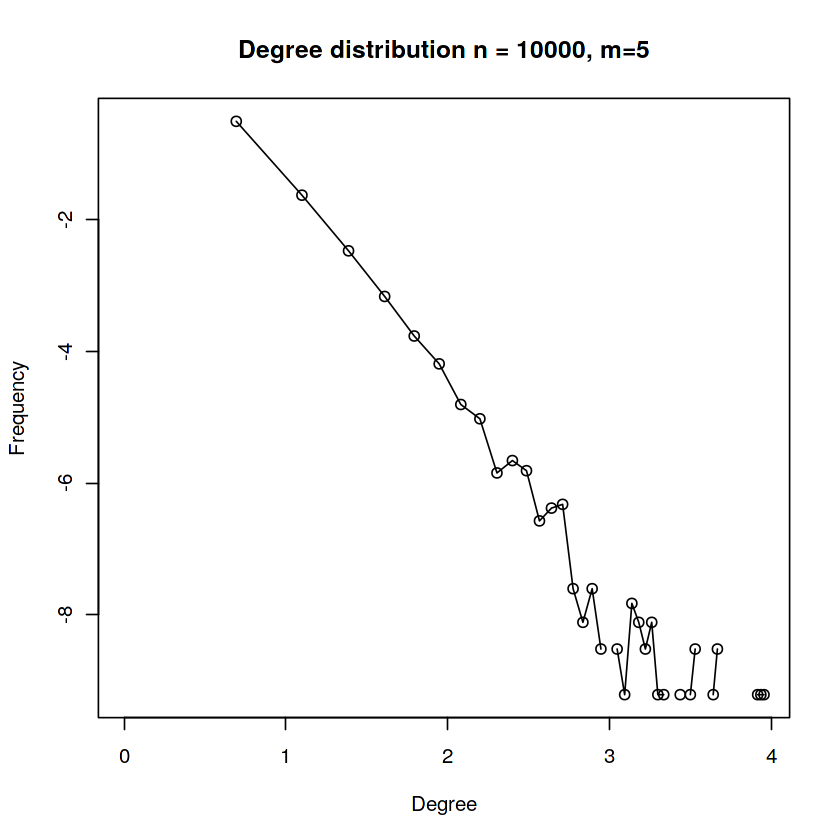


Call:
lm(formula = rand_deg_log ~ rand_log_freq)

Coefficients:
  (Intercept)  rand_log_freq  
       4.4222        -0.6161  


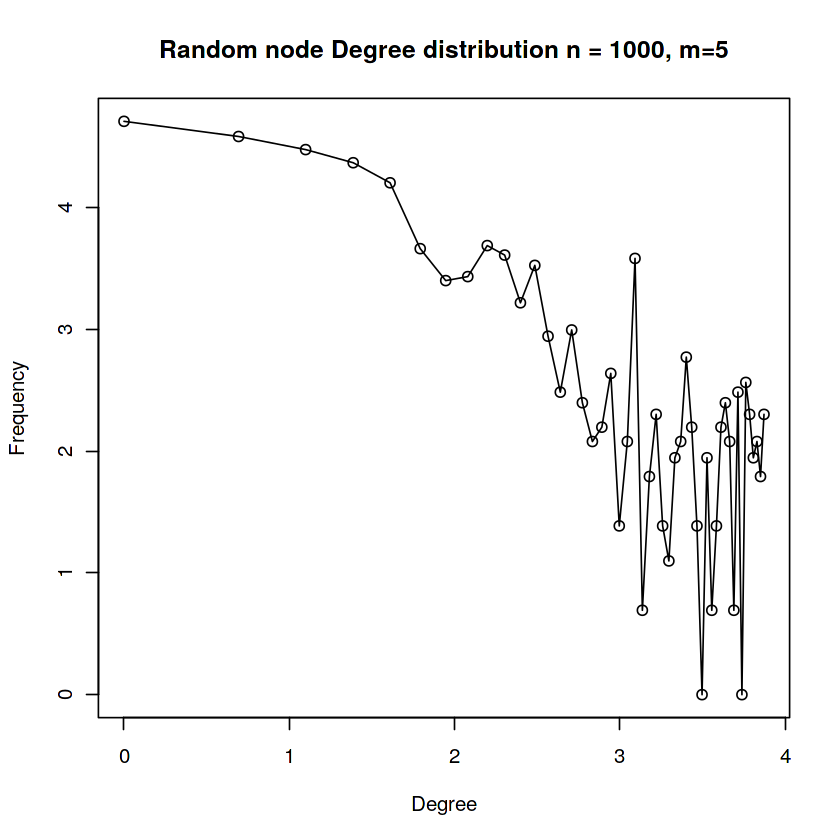


Call:
lm(formula = rand_deg_log ~ rand_log_freq)

Coefficients:
  (Intercept)  rand_log_freq  
       4.7887        -0.4978  


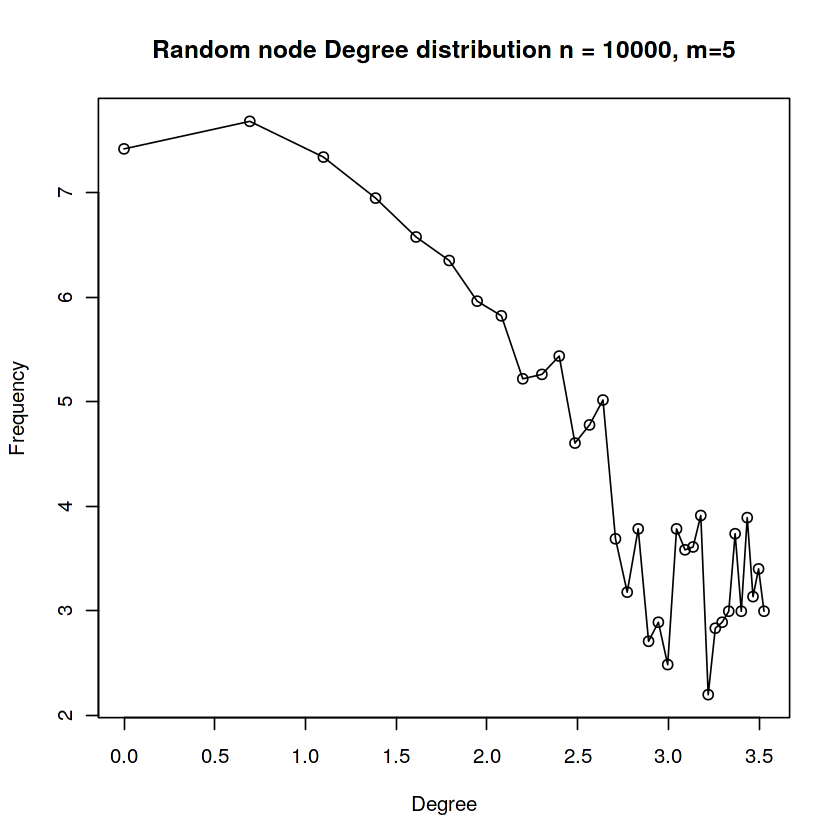

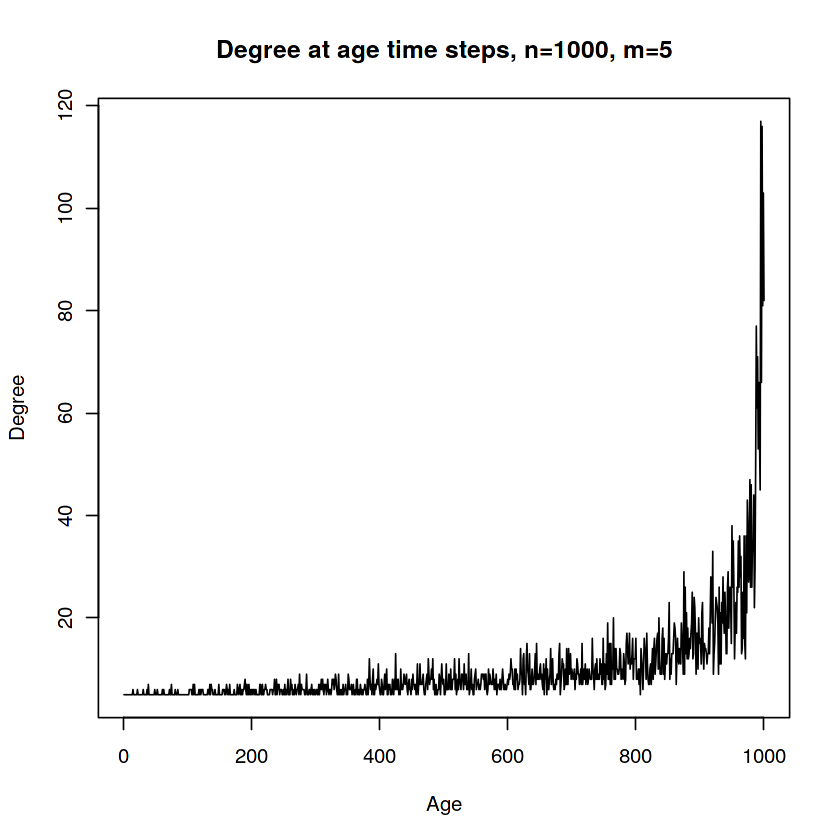

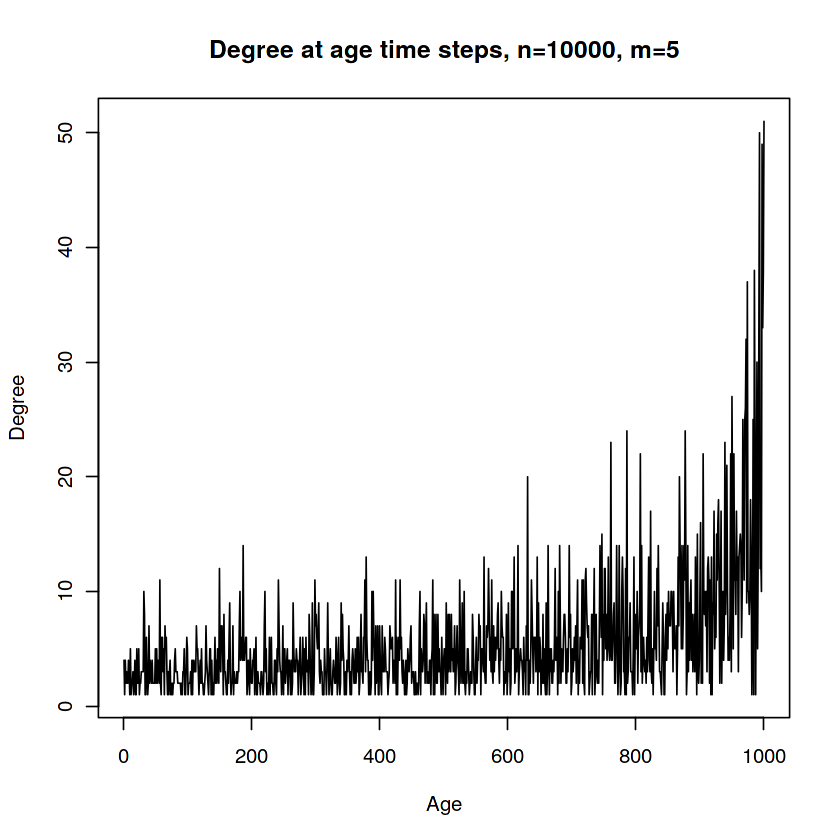

In [4]:
#part g - repeat for m = 5


#part b, c

g_p <- sample_pa(1000, m=5, directed=FALSE)


greedy_p <- cluster_fast_greedy(g_p)
plot(g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Original network, n=1000, m=5")
plot(greedy_p, g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Fast greedy cluster, n = 1000, m=5")

mod_p <- modularity(greedy_p)
cat(paste("Modularity, n=1000: ", mod_p, "\n", sep=""))
cat(paste("Community size: ", length(greedy_p)))



large_g_p <- sample_pa(10000, m=1, directed=FALSE)


large_greedy_p <- cluster_fast_greedy(large_g_p)
plot(large_g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Original network, n=10000, m=5")
plot(large_greedy_p, large_g_p, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Fast greedy cluster, n = 10000, m=5")

large_mod_p <- modularity(large_greedy_p)
cat(paste("Modularity, n=10000: ", large_mod_p, "\n", sep=""))
cat(paste("Community size: ", length(large_greedy_p)))

#part d

deg <- degree_distribution(g_p)
large_deg <- degree_distribution(large_g_p)

    
#x values
log_x <- log(c(1:length(deg)))
large_log_x <- log(c(1:length(large_deg)))
#y values
deg_log <- log(deg)
large_deg_log <- log(large_deg)

#plot log-log
plot(log_x, deg_log, type="o", xlab = "Degree", ylab = "Frequency", main = "Degree distribution n = 1000, m=5")
plot(large_log_x, large_deg_log, type="o", xlab = "Degree", ylab = "Frequency", main = "Degree distribution n = 10000, m=5")


#remove -inf from log(0)
deg_log = replace(deg_log, is.infinite(deg_log), -10)
lm(deg_log ~ log_x)

large_deg_log = replace(large_deg_log, is.infinite(large_deg_log), -10)
lm(large_deg_log ~ large_log_x)

#part e

#g_p, large_g_p

n <- 1000
rand_degree <- c()

#pick random node i
for (i in 1:n) 
{
    rand_node <- sample(1:n, 1)
    #pick random neighbor j
    rand_neighbors <- neighbors(g_p, v=rand_node)
    if (length(neighbors) > 0)
    {
        neighbor_index <- sample(1:length(rand_neighbors), 1)
        rand_degree[i] <- degree(g_p, rand_neighbors[neighbor_index]) 
    }
}


# get degree - frequency vectors
deg_table <- as.data.frame(table(rand_degree))
#degrees <- as.numeric(as.vector((degree.freq.table[[1]])))
#freq <- degree.freq.table[[2]] / n


rand_deg_log <- log(as.numeric(deg_table$rand_degree))
rand_log_freq <- log(as.numeric(deg_table$Freq))

plot(rand_deg_log, rand_log_freq, type="o", xlab = "Degree", ylab = "Frequency", main = "Random node Degree distribution n = 1000, m=5")

#find slopes
rand_deg_log = replace(rand_deg_log, is.infinite(rand_deg_log), -10)
lm(rand_deg_log ~ rand_log_freq)


#do the same thing for n=10000

n <- 10000
rand_degree <- c()

#pick random node i
for (i in 1:n) 
{
    rand_node <- sample(1:n, 1)
    #pick random neighbor j
    rand_neighbors <- neighbors(large_g_p, v=rand_node)
    if (length(neighbors) > 0)
    {
        neighbor_index <- sample(1:length(rand_neighbors), 1)
        rand_degree[i] <- degree(large_g_p, rand_neighbors[neighbor_index]) 
    }
}


# get degree - frequency vectors
deg_table <- as.data.frame(table(rand_degree))


rand_deg_log <- log(as.numeric(deg_table$rand_degree))
rand_log_freq <- log(as.numeric(deg_table$Freq))

plot(rand_deg_log, rand_log_freq, type="o", xlab = "Degree", ylab = "Frequency", main = "Random node Degree distribution n = 10000, m=5")


#find slopes
rand_deg_log = replace(rand_deg_log, is.infinite(rand_deg_log), -10)
lm(rand_deg_log ~ rand_log_freq)


#part f

#g_p, large_g_p

age_deg <-rev(degree(g_p)[1:1000])
plot(age_deg, type='l', xlab = "Age", ylab = "Degree", main="Degree at age time steps, n=1000, m=5")

large_age_deg <-rev(degree(large_g_p)[1:1000])
plot(large_age_deg, type='l', xlab = "Age", ylab = "Degree", main="Degree at age time steps, n=10000, m=5")

[1] "Modularity:  0.869629890150412"
[1] "Connected:  TRUE"


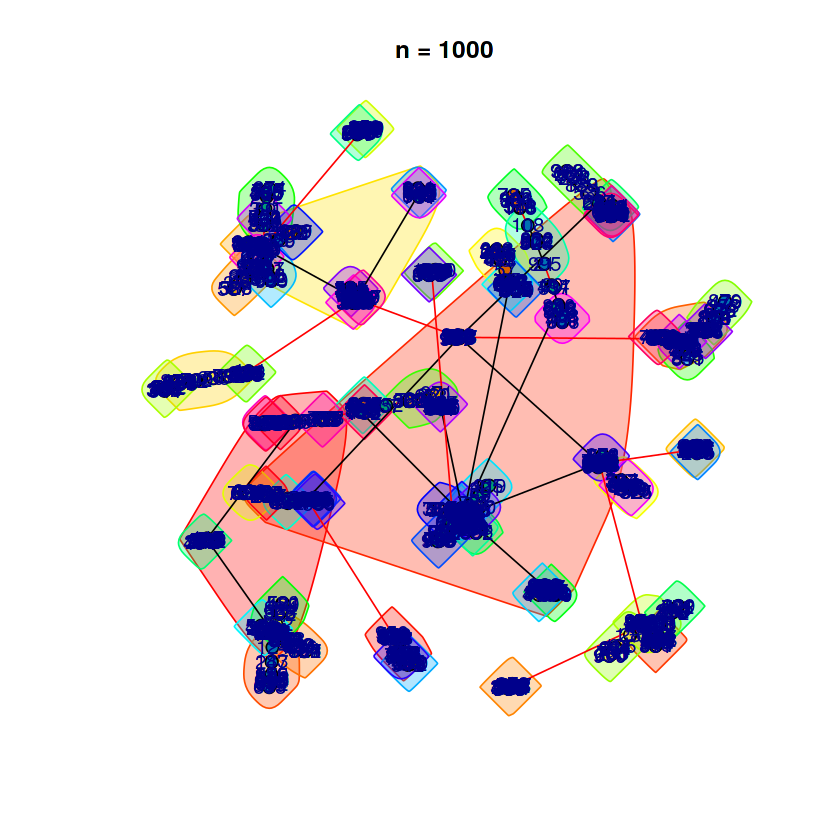

[1] "Modularity:  0.736052368684995"
[1] "Connected:  FALSE"


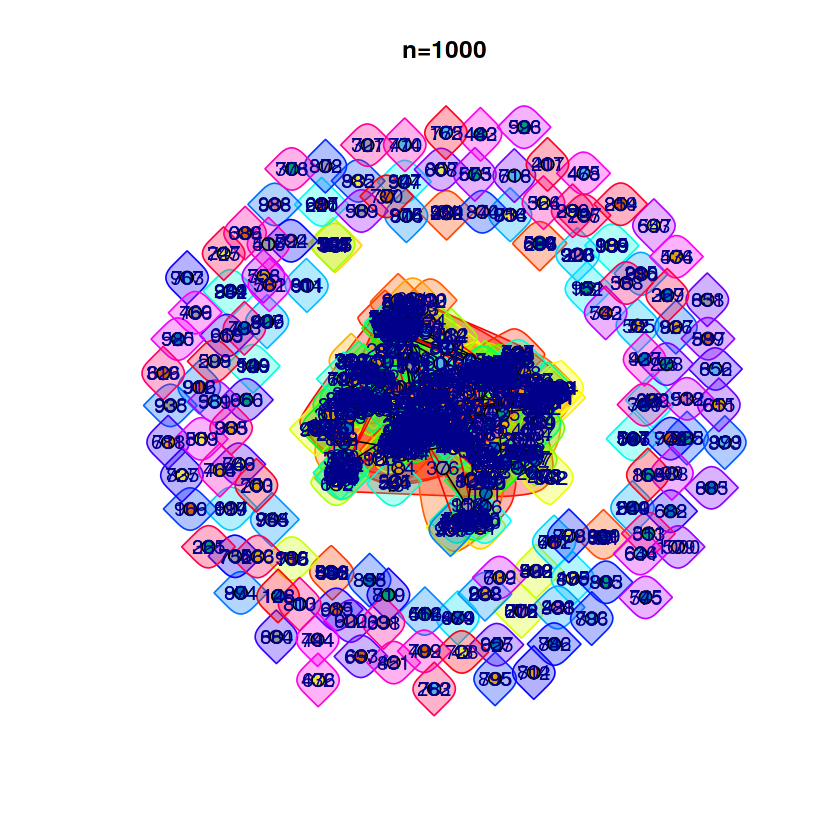

In [5]:
# part h

g_p <- sample_pa(1000, m=1, directed=FALSE)


deg_seq_g_p = sample_degseq(degree(g_p), method="simple.no.multiple")


clust_p <- cluster_walktrap(g_p)
clust_deg_seq <- cluster_walktrap(deg_seq_g_p)
    
plot(clust_p, g_p, edge.arrow.size=.1, vertex.size=4, main="n = 1000")
print(paste("Modularity: ", modularity(g_p, membership(clust_p))))
print(paste("Connected: ", is_connected(g_p)))

plot(clust_deg_seq, deg_seq_g_p, edge.arrow.size=.1, vertex.size=4,, main="n=1000")
print(paste("Modularity: ", modularity(deg_seq_g_p, membership(clust_deg_seq))))
print(paste("Connected: ", is_connected(deg_seq_g_p)))

# Question 1.3

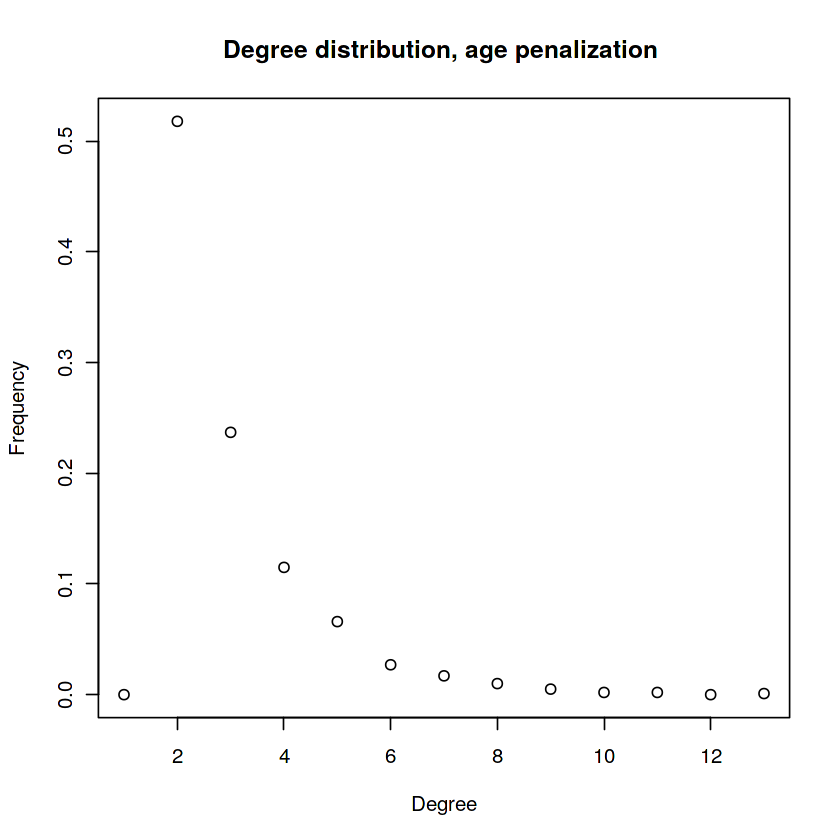

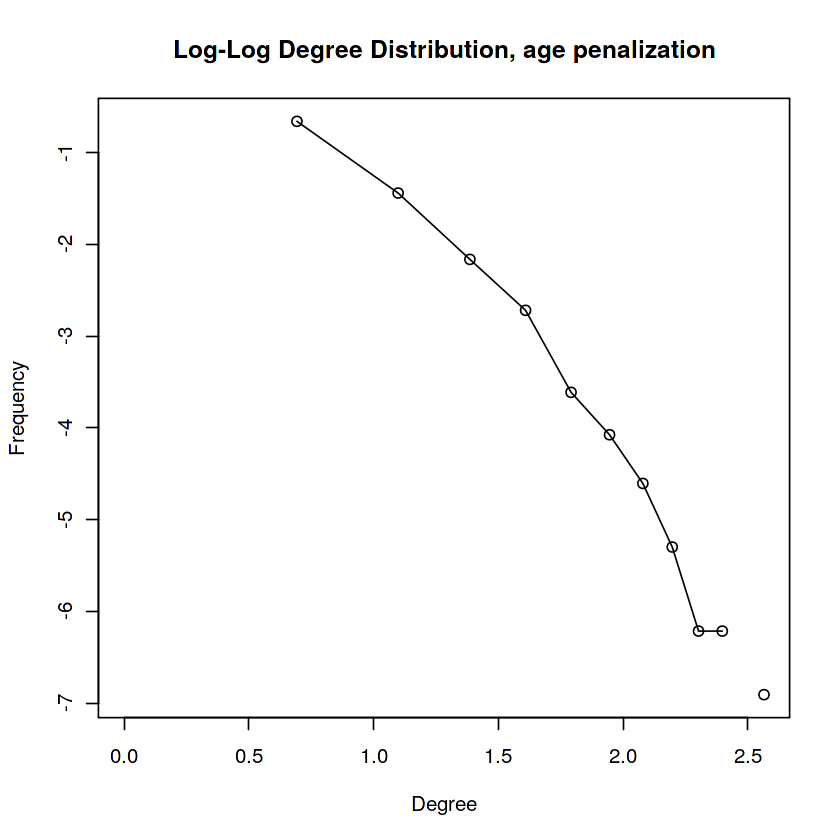

In [6]:
# part a

pa_age = sample_pa_age(1000, pa.exp=1, aging.exp=-1, aging.bin=1000, directed=F)

pa_age_deg_dist = degree_distribution(pa_age)
# TODO: Check a = c = d = 1, b = 0

plot(pa_age_deg_dist, main="Degree distribution, age penalization ",xlab="Degree",ylab="Frequency")

log_degree <- log(c(1:length(pa_age_deg_dist)))
log_distr <- log(pa_age_deg_dist)
plot(log_degree, log_distr, type="o",main=paste("Log-Log Degree Distribution, age penalization"),xlab="Degree",ylab="Frequency")


Modularity, n=1000: 0.935756577398223
Community size:  32

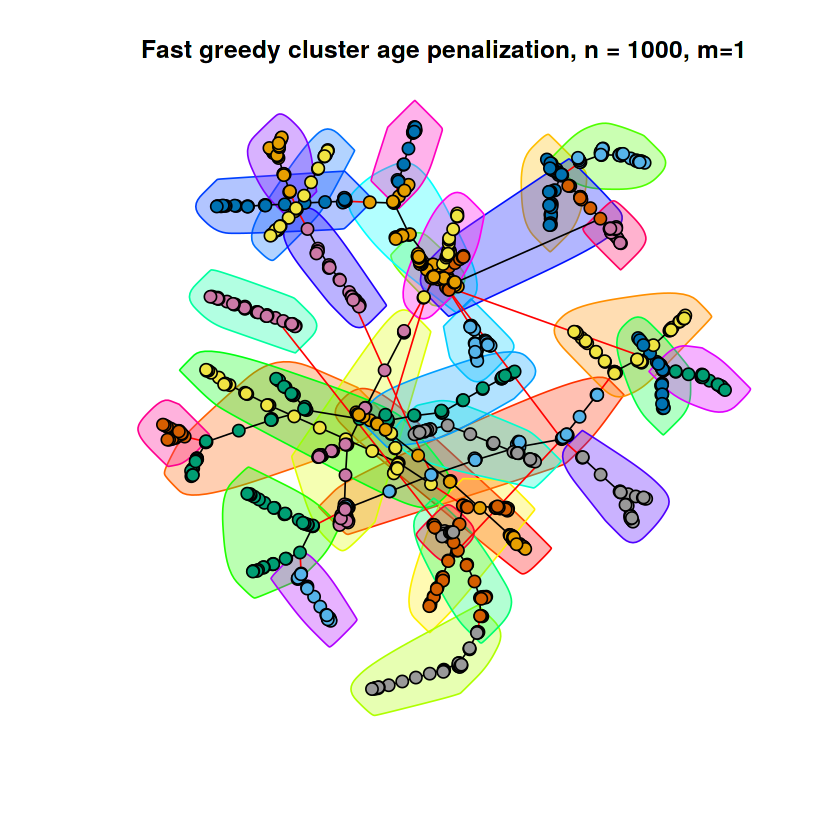

In [7]:
#part b
greedy_pa_age <- cluster_fast_greedy(pa_age)

plot(greedy_pa_age, pa_age, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Fast greedy cluster age penalization, n = 1000, m=1")

mod_pa <- modularity(greedy_pa_age)
cat(paste("Modularity, n=1000: ", mod_pa, "\n", sep=""))
cat(paste("Community size: ", length(greedy_pa_age)))


In [8]:
#comment